In [2]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=fc99574a12f602ed52e73a0cfded9faa3b39026c2f10aba39e0bd12e041a5adb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [4]:
from bs4 import BeautifulSoup as soup
from datetime import date,datetime
from urllib.request import Request,urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from random import choices
color_ls = '1234567890'*10
def color():
    return '#'+''.join(choices(color_ls , k=6))

In [5]:
today = datetime.now()
yesterday_str = "%s %d,%d" %(date.today().strftime("%b"),today.day-1,today.year)
yesterday_str


'Apr 19,2024'

In [6]:
#WEB SCRAPPING
url = "https://www.worldometers.info/coronavirus/#countries"
req = Request(url,headers={'User-Agent':"Google Chrome"})
webpage = urlopen(req)
page_soup = soup(webpage,"html.parser")


In [7]:
table = page_soup.findAll("table",{"id":"main_table_countries_yesterday"})
containers = table[0].findAll("tr",{"style":""})
title = containers[0]
del containers[0]
all_data = []
clean = True
for country in containers :
  country_data = []
  country_container = country.findAll("td")
  if country_container[1].text == 'China':
    continue
  for i in range(1,len(country_container)):
    final_feature = country_container[i].text
    if clean:
      if i != 1 and i != len(country_container)-1:
        final_feature = final_feature.replace(",","")
        if final_feature.find('+') != -1:
          final_feature = final_feature.replace("+","")
          final_feature = float(final_feature)
        elif final_feature.find('-') != -1:
          final_feature = final_feature.replace("-","")
          final_feature = float(final_feature)*-1
    if final_feature == 'N/A':
      final_feature = 0
    elif final_feature == "" or final_feature == " ":
      final_feature = -1
    country_data.append(final_feature)
  all_data.append(country_data)

In [8]:
df= pd.DataFrame(all_data)
df.drop([15,16,17,18,19,20],inplace = True, axis= 1)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413,899.4,-1,-1,-1,All
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985,3642,1186851502,3544901,334805269,North America
2,India,45035393,68.0,533570,-1.0,0,0.0,0,0,32016,379,935879495,665334,1406631776,Asia
3,Germany,38828995,73.0,183027,16.0,38240600,-1.0,405368,0,462891,2182,122332384,1458359,83883596,Europe
4,Brazil,38743918,-1.0,711380,-1.0,36249161,-1.0,1783377,0,179908,3303,63776166,296146,215353593,South America
5,Japan,33803572,-1.0,74694,-1.0,0,0.0,0,0,269169,595,100414883,799578,125584838,Asia
6,Italy,26723249,-1.0,196487,-1.0,26361218,-1.0,165544,22,443445,3261,281126449,4665010,60262770,Europe
7,Russia,24124215,-1.0,402756,-1.0,23545818,-1.0,175641,0,165454,2762,273400000,1875095,145805947,Europe
8,Turkey,17232066,-1.0,102174,-1.0,0,0.0,0,0,201399,1194,162743369,1902052,85561976,Asia
9,Spain,13914811,-1.0,121760,-1.0,13762417,-1.0,30634,231,297840,2606,471036328,10082298,46719142,Europe


In [9]:
column_labels = ["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","New Recovered","Active Cases","Serios/Critical","Total Cases/1M","Deaths/1M","Total Tests","Test/1M","Population","Continent"]
df.columns = column_labels
df.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serios/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413,899.4,-1,-1,-1,All
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985,3642,1186851502,3544901,334805269,North America
2,India,45035393,68.0,533570,-1.0,0,0.0,0,0,32016,379,935879495,665334,1406631776,Asia
3,Germany,38828995,73.0,183027,16.0,38240600,-1.0,405368,0,462891,2182,122332384,1458359,83883596,Europe
4,Brazil,38743918,-1.0,711380,-1.0,36249161,-1.0,1783377,0,179908,3303,63776166,296146,215353593,South America
5,Japan,33803572,-1.0,74694,-1.0,0,0.0,0,0,269169,595,100414883,799578,125584838,Asia
6,Italy,26723249,-1.0,196487,-1.0,26361218,-1.0,165544,22,443445,3261,281126449,4665010,60262770,Europe
7,Russia,24124215,-1.0,402756,-1.0,23545818,-1.0,175641,0,165454,2762,273400000,1875095,145805947,Europe
8,Turkey,17232066,-1.0,102174,-1.0,0,0.0,0,0,201399,1194,162743369,1902052,85561976,Asia
9,Spain,13914811,-1.0,121760,-1.0,13762417,-1.0,30634,231,297840,2606,471036328,10082298,46719142,Europe


In [10]:
#converting data to numeric format
for label in df.columns:
  if label != 'Country' and label !='Continent':
    df[label]= pd.to_numeric(df[label])

In [11]:
df["%Inc Cases"] = df["New Cases"]/df["Total Cases"]*100
df["%Inc Deaths"] = df["New Deaths"]/df["Total Deaths"]*100
df["%Inc Recovered"] = df["New Recovered"]/df["Total Recovered"]*100
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serios/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered
0,World,704753890,3959.0,7010681,57.0,675619021,14953.0,22124188,34791,90413.0,899.4,-1,-1,-1,All,0.000562,0.000813,0.002213
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985.0,3642.0,1186851502,3544901,334805269,North America,0.001029,0.000574,0.009206
2,India,45035393,68.0,533570,-1.0,0,0.0,0,0,32016.0,379.0,935879495,665334,1406631776,Asia,0.000151,-0.000187,NaN
3,Germany,38828995,73.0,183027,16.0,38240600,-1.0,405368,0,462891.0,2182.0,122332384,1458359,83883596,Europe,0.000188,0.008742,-0.000003
4,Brazil,38743918,-1.0,711380,-1.0,36249161,-1.0,1783377,0,179908.0,3303.0,63776166,296146,215353593,South America,-0.000003,-0.000141,-0.000003


EXPLORATORY DATA ANALYSIS

In [12]:
cases = df[["Total Recovered","Active Cases","Total Deaths"]].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type','Total']
cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df["virus"] = ['COVID-19' for i in range(len(cases_df))]
cases_df
#plot percentage and virus
fig = px.bar(cases_df,x="virus",y="Percentage",color="Type",hover_data=["Total"])
fig.show()

In [13]:
cases = df[["New Cases","New Recovered","New Deaths"]].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type','Total']
cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df["virus"] = ['COVID-19' for i in range(len(cases_df))]
cases_df
#plot percentage and virus
fig = px.bar(cases_df,x="virus",y="Percentage",color="Type",hover_data=["Total"])
fig.show()

In [14]:
per = np.round(df[["%Inc Cases","%Inc Deaths","%Inc Recovered"]].loc[0],2)
per_df = pd.DataFrame(per)
per_df.columns = ["%"]
fig = go.Figure()
fig.add_trace(go.Bar(x= per_df.index , y = per_df["%"] , marker_color = ['Yellow','blue','red']))
fig.show()

In [15]:
#CONTINENTS
continent_df = df.groupby("Continent").sum().drop("All")
continent_df = continent_df.reset_index()
continent_df

,Continent,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serios/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,%Inc Cases,%Inc Deaths,%Inc Recovered
0,Africa,South AfricaMoroccoTunisiaEgyptLibyaEthiopiaRé...,12735512,-54.0,253569,-54.0,9091424,-47.0,331499,356,1991266.0,16684.0,110445941,10904366,1356348893,-0.217847,85.570998,-50.170643
1,Asia,IndiaJapanTurkeyVietnamIranIndonesiaMalaysiaIs...,166654250,724.0,1484539,-7.0,53866148,-31.0,1424053,340,5580338.0,31423.0,2159532568,78326908,3131766390,-0.005323,-8.392328,-0.056270
2,Australia/Oceania,AustraliaNew ZealandNew CaledoniaFrench Polyne...,14879633,646.0,32996,-19.0,14599387,4286.0,33714,-5,4734517.0,9415.0,91668186,21293233,43410351,-1.502814,-97.524827,99.547004
3,Europe,GermanyItalyRussiaSpainNetherlandsPolandAustri...,170126755,129.0,1515107,-23.0,159167484,79.0,875695,363,16304245.0,110677.0,1771413542,169925554,543145341,-0.027008,-10.562851,-0.002670
4,North America,USAMexicoCanadaGuatemalaCosta RicaCubaPanamaDo...,131836272,1116.0,1695409,-28.0,126430561,10435.0,1333140,1070,8402531.0,55808.0,1325143163,95149170,597829588,-0.261255,-108.844516,-0.247298
5,South America,BrazilArgentinaColombiaChileBoliviaUruguayPara...,64556094,1205.0,1109128,-11.0,60548914,-9.0,1999425,621,1880239.0,24629.0,203294124,10262729,385893335,0.018477,-0.428744,-0.010687


In [16]:
#COUNTRIES
df=df.drop([len(df)-1])
country_df = df.drop([0])
country_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serios/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered
1,USA,111820082,1151.0,1219487,7.0,109814428,10109.0,786167,940,333985.0,3642.0,1186851502,3544901,334805269,North America,0.001029,0.000574,0.009206
2,India,45035393,68.0,533570,-1.0,0,0.0,0,0,32016.0,379.0,935879495,665334,1406631776,Asia,0.000151,-0.000187,NaN
3,Germany,38828995,73.0,183027,16.0,38240600,-1.0,405368,0,462891.0,2182.0,122332384,1458359,83883596,Europe,0.000188,0.008742,-0.000003
4,Brazil,38743918,-1.0,711380,-1.0,36249161,-1.0,1783377,0,179908.0,3303.0,63776166,296146,215353593,South America,-0.000003,-0.000141,-0.000003
5,Japan,33803572,-1.0,74694,-1.0,0,0.0,0,0,269169.0,595.0,100414883,799578,125584838,Asia,-0.000003,-0.001339,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Tuvalu,2943,-1.0,1,-1.0,0,0.0,0,0,243909.0,83.0,-1,-1,12066,Australia/Oceania,-0.033979,-100.000000,NaN
199,Saint Helena,2166,-1.0,-1,-1.0,2,-1.0,2164,-1,354211.0,-1.0,-1,-1,6115,Africa,-0.046168,100.000000,-50.000000
200,Montserrat,1403,-1.0,8,-1.0,1376,-1.0,19,-1,282578.0,1611.0,17762,3577442,4965,North America,-0.071276,-12.500000,-0.072674
201,Niue,1059,-1.0,-1,-1.0,1056,-1.0,3,-1,652898.0,-1.0,-1,-1,1622,Australia/Oceania,-0.094429,100.000000,-0.094697


In [17]:
LOOK_AT = 5
country = country_df.columns[1:14]
fig = go.Figure()
c = 0
for i in country_df.index:
  if c< LOOK_AT:
    fig.add_trace(go.Bar(name=country_df['Country'][i] , x = country , y = country_df.loc[i][1:14]))
  else:
    break
  c =+1
fig.update_layout(title= {'text': f' top {LOOK_AT} countries affected'},yaxis_type = "log")
fig.show()


In [18]:
#Correlation b/w total cases and new cases
corr=np.corrcoef(df['Total Cases'],df['New Cases'])[0,1]
corr


0.9260461093018575

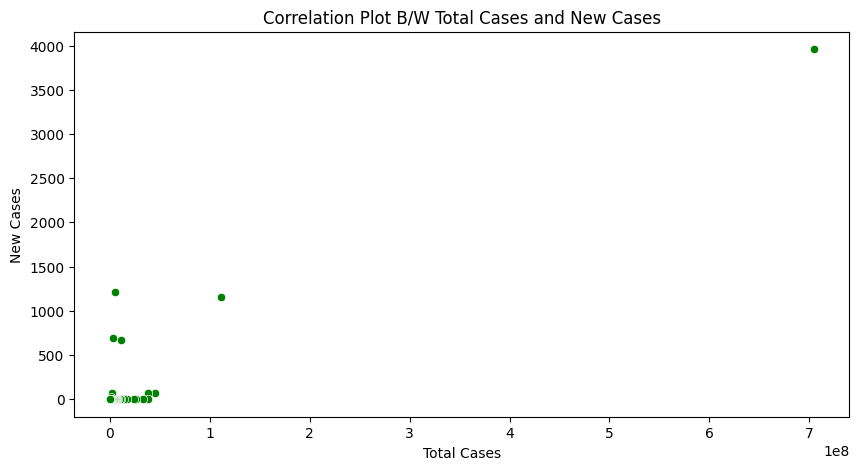

In [19]:
plt.figure(dpi=100 , figsize=(10,5))
plt.title('Correlation Plot B/W Total Cases and New Cases')
sns.scatterplot(x=df['Total Cases'] ,y=df['New Cases'] ,color='green')
plt.show()

In [20]:
#Correlation b/w total cases and active cases
corr=np.corrcoef(df['Total Cases'],df['Active Cases'])[0,1]
corr


0.986657400602162

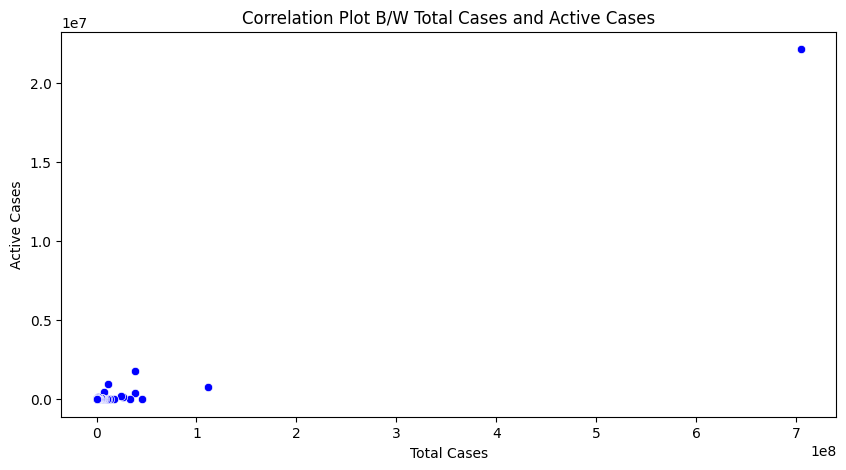

In [21]:
plt.figure(dpi=100 , figsize=(10,5))
plt.title('Correlation Plot B/W Total Cases and Active Cases')
sns.scatterplot(x=df['Total Cases'] ,y=df['Active Cases'] ,color='blue')
plt.show()

In [22]:
#Correlation b/w total cases and new Deaths
corr=np.corrcoef(df['Total Cases'],df['New Deaths'])[0,1]
corr

0.8380966179401459

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

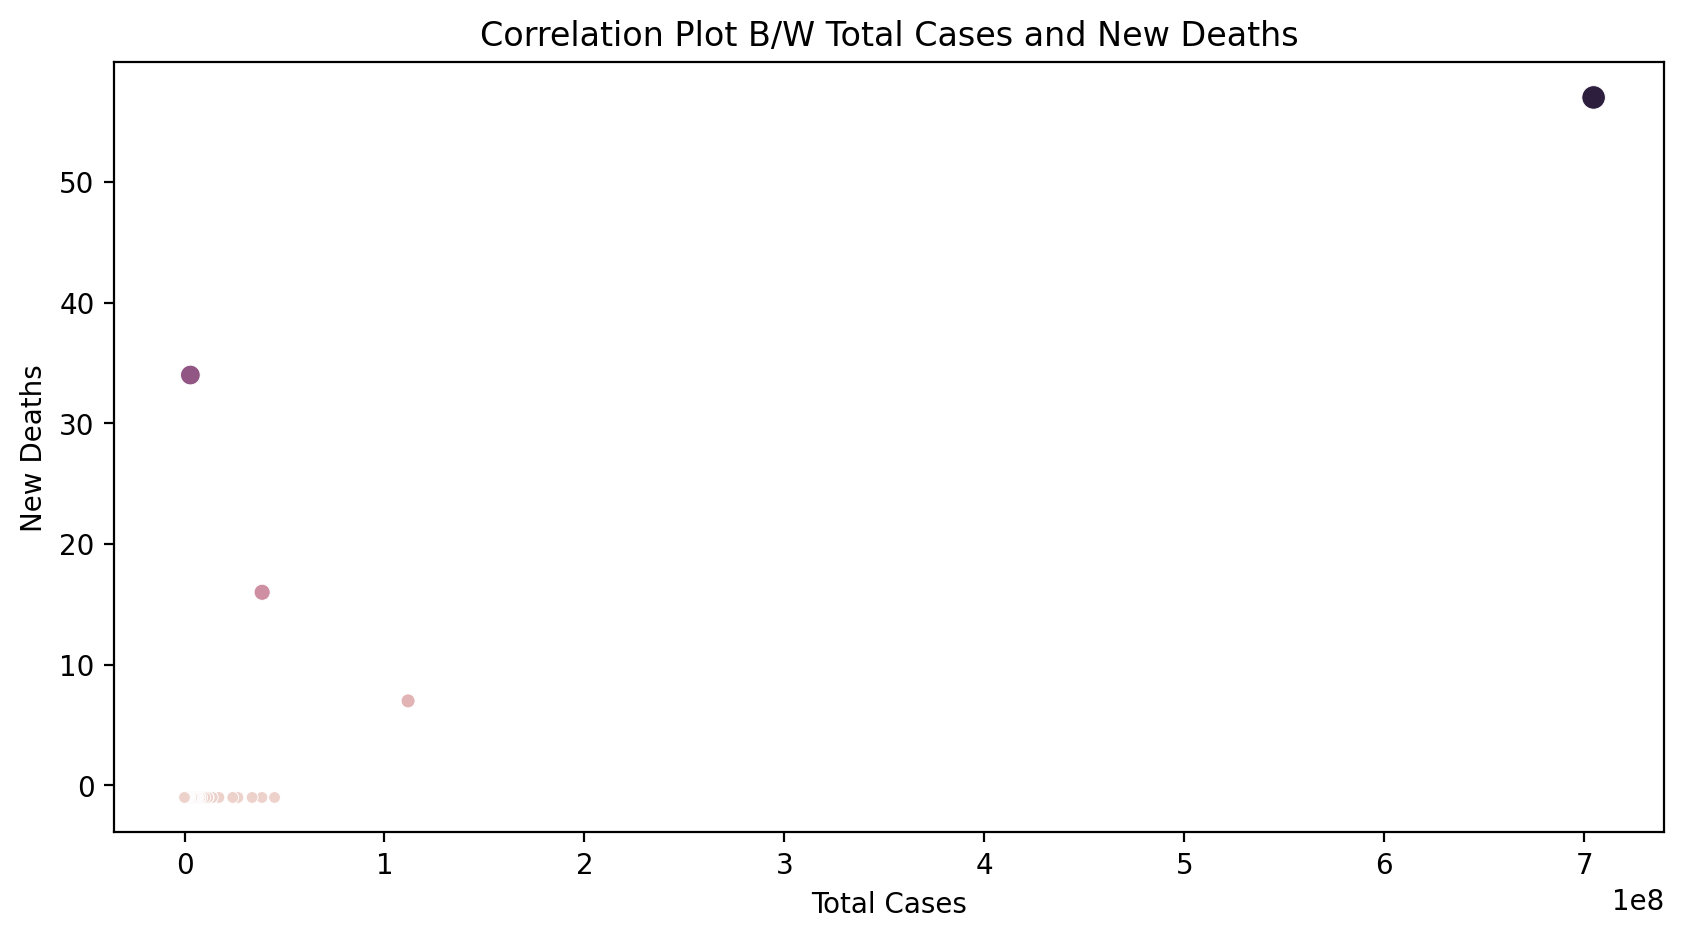

In [23]:
plt.figure(dpi=200 , figsize=(10,5))
plt.title('Correlation Plot B/W Total Cases and New Deaths')
sns.scatterplot(x=df['Total Cases'] ,y=df['New Deaths'],data=df ,label=f'Corr : { corr :.2f}' , hue='New Deaths', size='New Deaths'  ,)
plt.show()

In [24]:
cat_col = ['Continent']
num_col = ['Total Cases', 'Active Cases','New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered']

TypeError: pointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

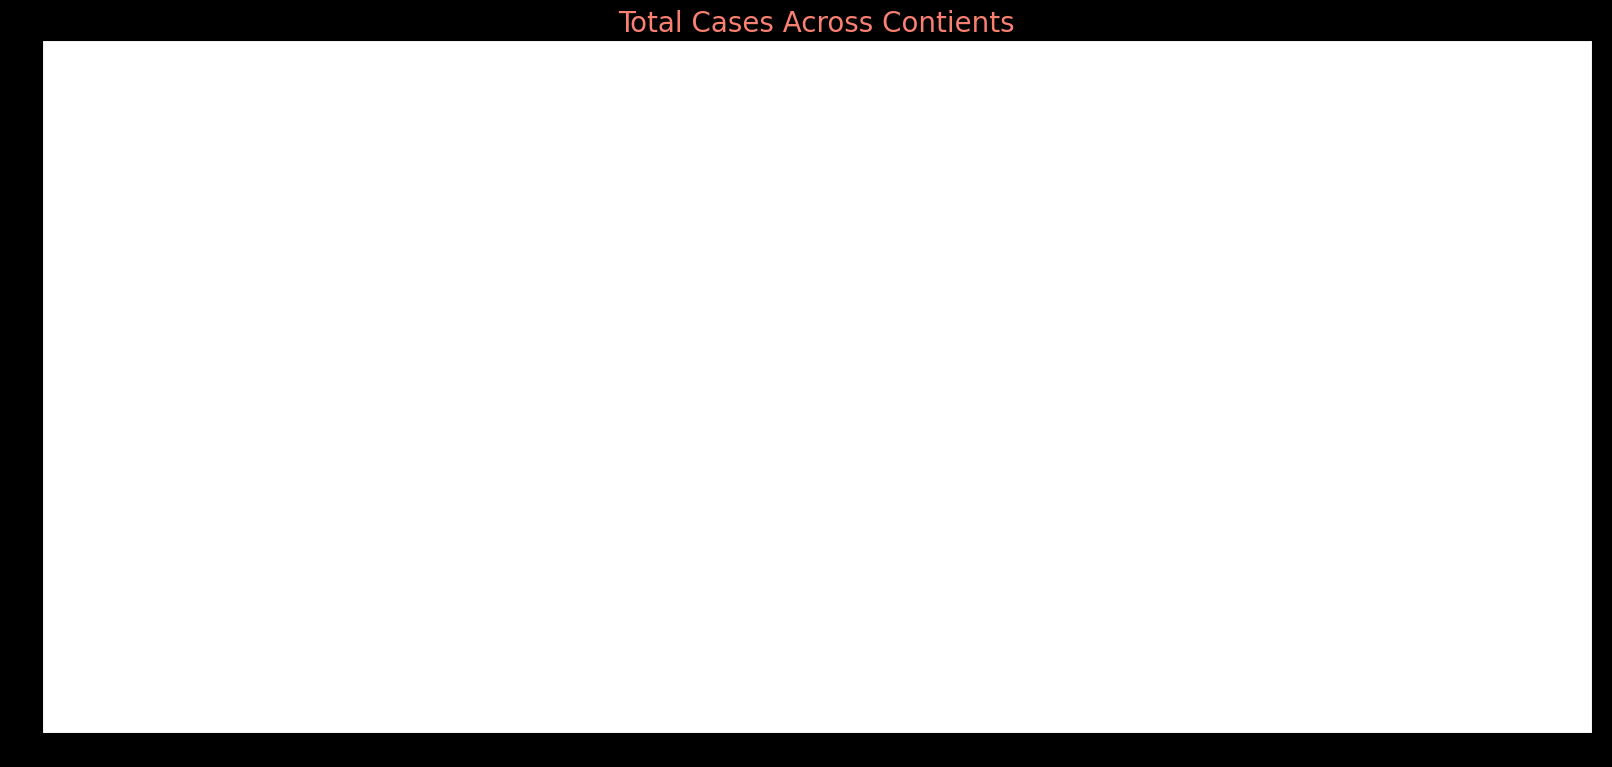

In [25]:
# plot to see distribution of all feautures across all continents
for f in num_col:
    df1 = df.sort_values(by=[f],axis=0 , ignore_index=True)
    plt.figure(dpi=100 , figsize=(20 ,9) ,facecolor='black')
    plt.title(f'{f} Across Contients' , color='salmon' ,size=20)
    sns.pointplot(continent_df['Continent'] , df1[f] , color='salmon')
    plt.xticks(rotation=90 , color='salmon')
    plt.yticks(color='salmon')
    plt.grid(ls=':' ,color='black' ,lw=.5)
    plt.xlabel('Contient' ,fontdict={'size':16 , 'weight':'heavy','color':'salmon'})
    plt.ylabel(f ,fontdict={'size':16 , 'weight':'heavy','color':'salmon'})
    plt.show()
    print('\n\n\n\n\n')

In [26]:
avg_active_cases = df['Active Cases'].mean()
avg_deaths = df['Total Deaths'].mean()
avg_recovered = df['New Recovered'].mean()
avg_total_cases = df['Total Cases'].mean()
print(f'Average Total Cases Over All states : {avg_total_cases:>20.2f}')
print(f'Average Patient Discharged Over All states : {avg_recovered:>13.2f}')
print(f'Average Deaths Over All states : {avg_deaths:>24.2f}' )
print(f'Average Active Cases Over All states : {avg_active_cases:>17.2f}')

Average Total Cases Over All states :           6234199.04
Average Patient Discharged Over All states :        146.14
Average Deaths Over All states :                 64539.06
Average Active Cases Over All states :         138530.61


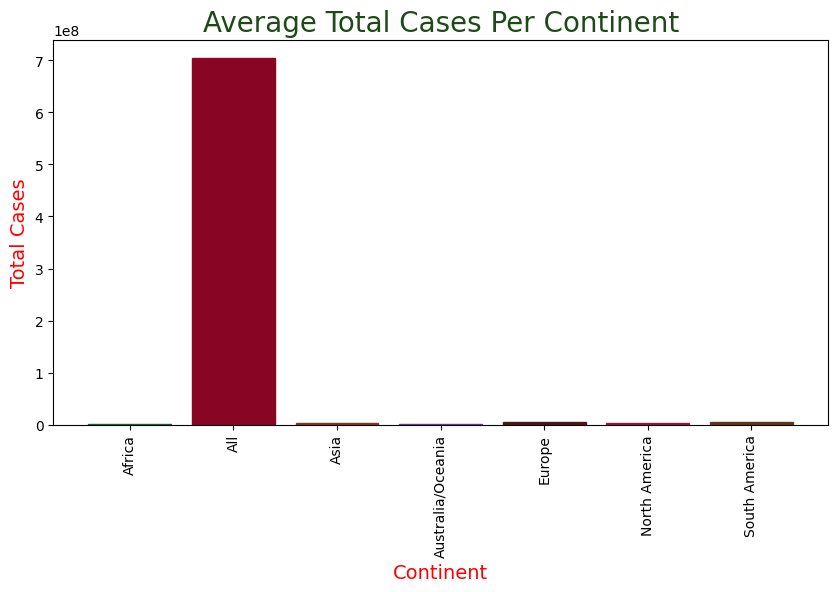

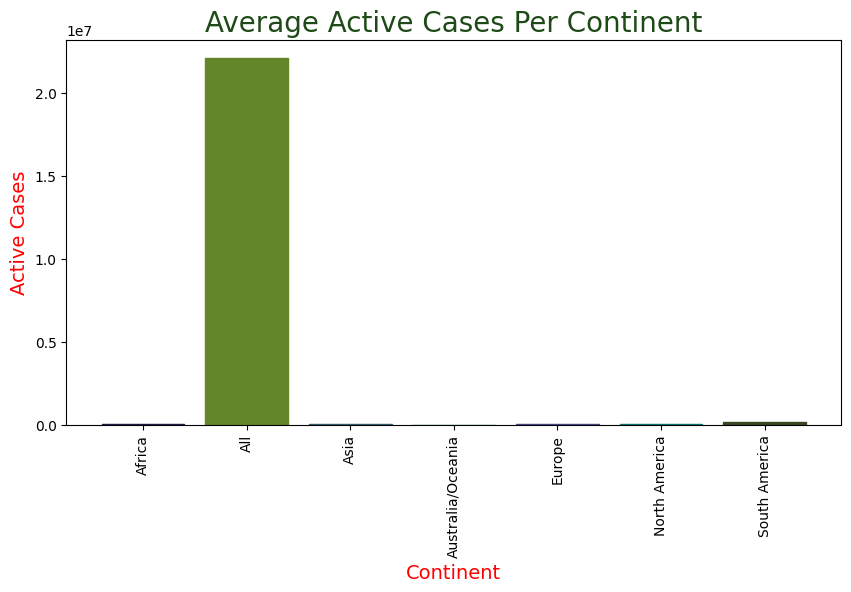

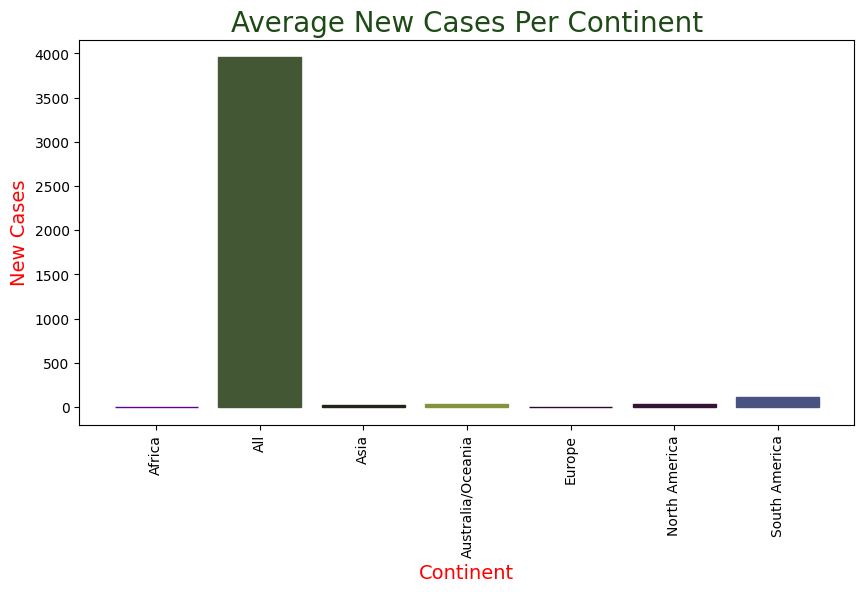

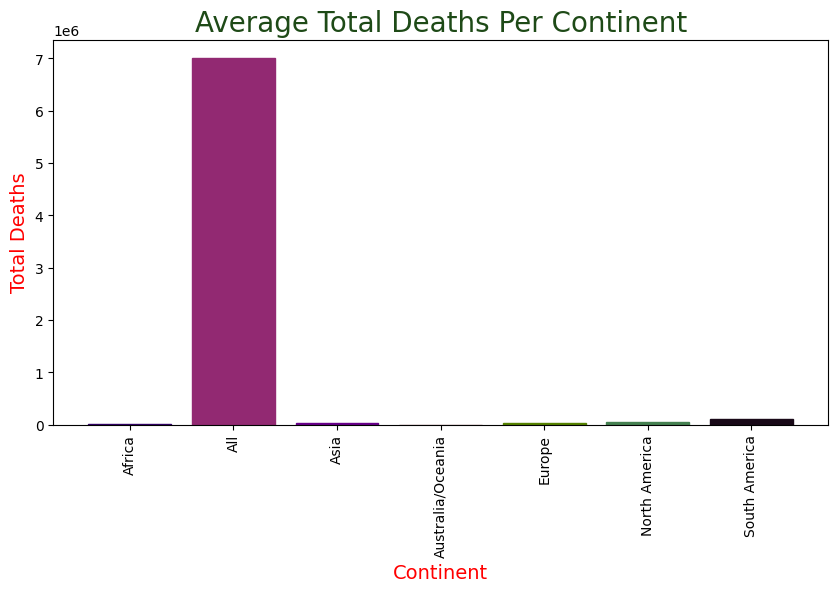

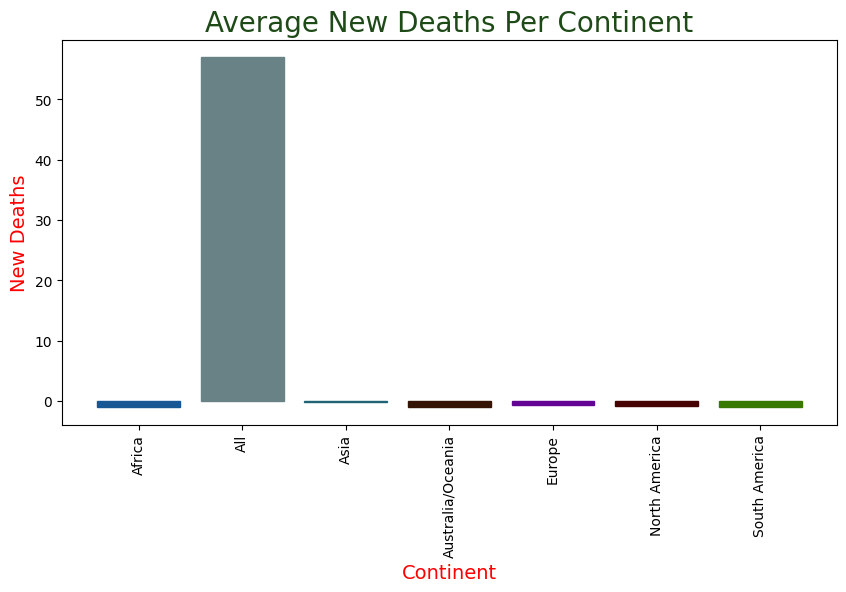

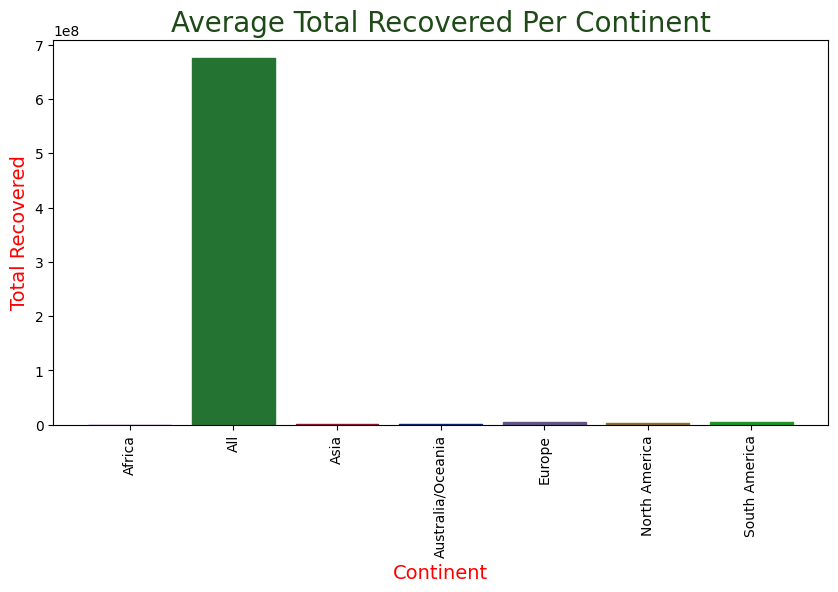

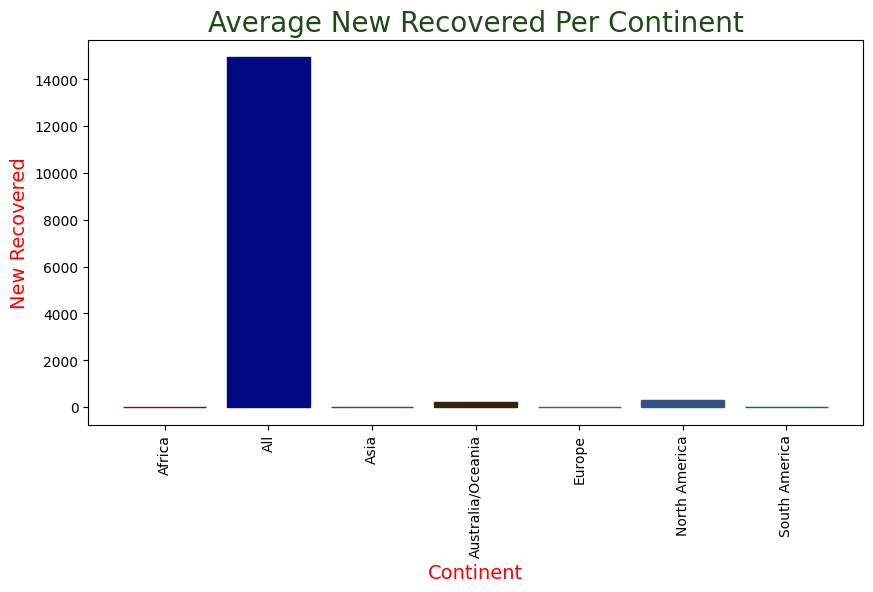

In [27]:
# Function to Plot Average numerical features pre Continent

def plot_avg(x_val , y_val):
    plt.figure(dpi=100 , figsize=(10 ,5))
    bars = plt.bar(x_val , y_val ,)
    for bar in bars:
        bar.set_color(color())
    plt.xlabel('Continent',fontdict={'size':14 , 'c':'red'})
    plt.xticks(rotation=90)
    plt.ylabel(num_features , fontdict={'size':14,'c':'red'})
    plt.title(f'Average {num_features} Per Continent',fontdict={'c':'#1E4A17','size':'20'})
    plt.show()
# Creating Plots via Loops
for num_features in num_col:
    grp_obj = df.groupby('Continent').agg({num_features : 'mean'})
    plot_avg(grp_obj.index , grp_obj[num_features])
    print('\n\n\n\n')

In [28]:
df.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serios/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,%Inc Cases,%Inc Deaths,%Inc Recovered
count,2.030000e+02,203.000000,2.030000e+02,203.000000,2.030000e+02,203.000000,2.030000e+02,203.000000,203.000000,203.000000,2.030000e+02,2.030000e+02,2.030000e+02,203.000000,203.000000,157.000000
mean,6.234199e+06,38.054187,6.453906e+04,-0.418719,5.415384e+06,146.137931,1.385306e+05,184.906404,192037.187192,1229.238424,2.788915e+07,1.900798e+06,2.984430e+07,-0.009829,-0.690549,0.312495
std,5.026489e+07,307.669026,5.030211e+05,4.911801,4.811890e+07,1297.476244,1.558723e+06,2442.074939,201531.986195,1268.678728,1.159610e+08,3.374173e+06,1.080898e+08,0.088102,16.637160,8.945974
min,8.000000e+01,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,0.000000e+00,-1.000000,381.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.250000,-100.000000,-50.000000
25%,2.750350e+04,-1.000000,2.120000e+02,-1.000000,1.490500e+03,-1.000000,3.000000e+00,-1.000000,17656.500000,148.500000,2.494935e+05,1.043395e+05,4.447320e+05,-0.003636,-0.437639,-0.004329
50%,2.032350e+05,-1.000000,1.971000e+03,-1.000000,5.356900e+04,-1.000000,3.050000e+02,0.000000,116173.000000,783.000000,1.660662e+06,7.074820e+05,5.554960e+06,-0.000492,-0.044444,-0.000535
75%,1.261415e+06,-1.000000,1.398500e+04,-1.000000,8.977475e+05,0.000000,3.865000e+03,0.000000,307343.500000,2040.000000,1.117155e+07,2.021872e+06,2.082730e+07,-0.000079,-0.006118,-0.000072
max,7.047539e+08,3959.000000,7.010681e+06,57.000000,6.756190e+08,14953.000000,2.212419e+07,34791.000000,771655.000000,5661.000000,1.186852e+09,2.330212e+07,1.406632e+09,0.023693,100.000000,100.000000


In [29]:
#checking relationship b/w data
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

ValueError: could not convert string to float: 'World'

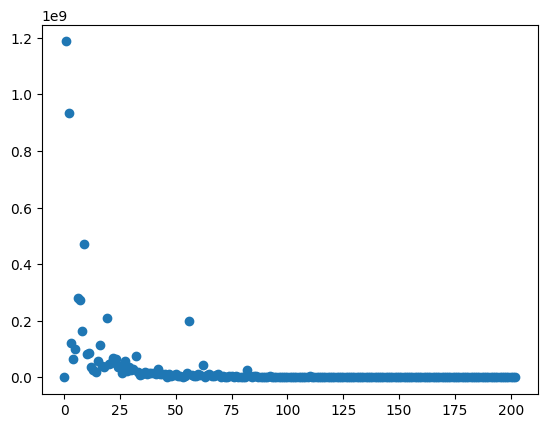

In [30]:
plt.scatter(df.index,df['Total Tests'])
plt.show()

(array([  2.,   0.,   0.,   0., 164.,  50.,   0.,   0.,   0.,   4.]),
 array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 <a list of 10 Patch objects>)

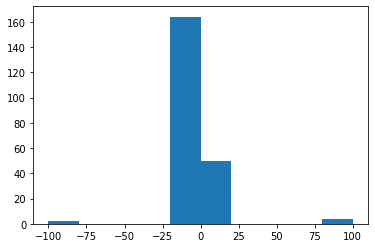

In [ ]:
plt.hist(df['%Inc Deaths'])

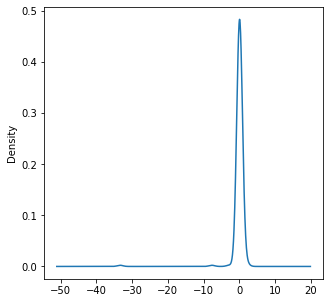

In [ ]:
plt.figure(figsize=(5,5))
df['%Inc Cases'].plot(kind='density')

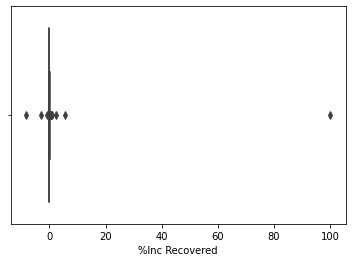

In [ ]:
sns.boxplot(df['%Inc Recovered'])

In [ ]:
Xnew= df.drop(df.index[0])
x=Xnew
x
X=x['Total Cases']
X

1      87861132
2      43270577
3      31644703
4      30028853
5      27095988
         ...   
215        1014
216         454
217          35
218          13
219           3
Name: Total Cases, Length: 219, dtype: int64

In [ ]:
y=x['Total Tests']
y

1      1041856313
2       856390449
3        63776166
4       271490188
5       122332384
          ...    
215         13588
216         20508
217         21923
218            -1
219            -1
Name: Total Tests, Length: 219, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170,)
(49,)
(170,)
(49,)


In [ ]:
X_train1 = X_train.values.reshape(-1,1)
print(X_train1.shape)
y_train1 = y_train.values.reshape(-1,1)
print(y_train1.shape)
X_test1 = X_test.values.reshape(-1,1)
print(X_test1.shape)
y_test1 = y_test.values.reshape(-1,1)
print(y_test1.shape)

(170, 1)
(170, 1)
(49, 1)
(49, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression()

In [ ]:
# print the intercept
print(model.intercept_)

[-3237767.15191424]


In [ ]:
model.score(X_train1,y_train1)*100

65.7306106619387

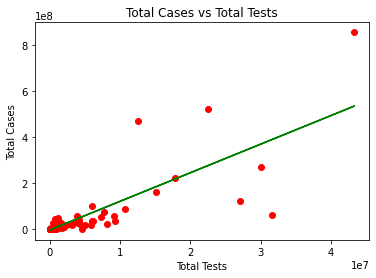

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train1, y_train1)
plt.scatter(X_train1 , y_train1, color = "red")
plt.plot(X_train1, lr.predict(X_train1), color = "green")
plt.title("Total Cases vs Total Tests")
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
Sx = sc_X.fit_transform(X_train1)
Sy = sc_y.fit_transform(y_train1)

In [ ]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(Sx,Sy.ravel())

SVR()

In [ ]:
reg.score(Sx,Sy)*100

49.641192288991306

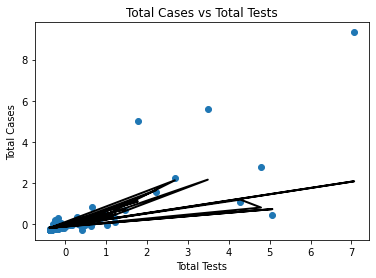

In [ ]:
plt.scatter(Sx,Sy)
plt.plot(Sx,reg.predict(Sx),color='k',linewidth='2')
plt.title("Total Cases vs Total Tests")
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
X_opt = X_train1
model_OLS = sm.OLS(endog = y_train1, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              357.2
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                    1.55e-43
Time:                        05:48:28   Log-Likelihood:                         -3262.7
No. Observations:                 170   AIC:                                      6527.
Df Residuals:                     169   BIC:                                      6530.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.2598      0.649     18.900      0.000      10.979      13.540
==============================================================================
Omnibus:                      112.097   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5471.372
Skew:                           1.634   Prob(JB):                         0.00
Kurtosis:                      30.600   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [ ]:
R.fit(X_train1,y_train1)

Ridge(alpha=0.0001)

In [ ]:
y2_pred=R.predict(X_test1)

In [ ]:
R.score(X_train1,y_train1)*100

65.7306106619387

In [ ]:
#importing the model and data-fitting
from sklearn.tree import DecisionTreeRegressor
DTT=DecisionTreeRegressor(random_state=0)
DTT.fit(X_train1,y_train1)

DecisionTreeRegressor(random_state=0)

In [ ]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [ ]:
DTT.score(X,y)*100

94.18270944131648

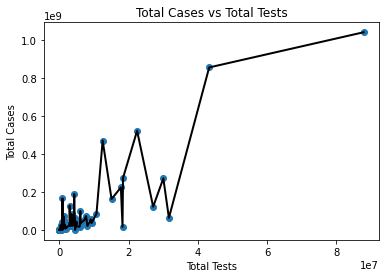

In [ ]:
plt.scatter(X,y)
plt.plot(X,y,color='k',linewidth='2')
plt.title("Total Cases vs Total Tests")
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.show()

In [ ]:
y_predict = DTT.predict(X_test1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train1,y_train1)

RandomForestRegressor()

In [ ]:
y3_pred=rfr.predict(X_test1)

In [ ]:
rfr.score(X,y)*100

81.97028504057859

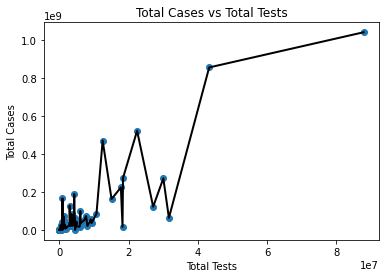

In [ ]:
plt.scatter(X,y)
plt.plot(X,y,color='k',linewidth='2')
plt.title("Total Cases vs Total Tests")
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.show()

In [ ]:
parameters={
    "n_estimators": (10,30,50,100),
    #"criterion": ("gini","entropy"),
    #"max_depth": (3,4,5,7),
    "max_features": ("auto","sqrt","log2"),
    "min_samples_split": (2,4,6),
    "bootstrap": (True, False)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
Rf_grid=GridSearchCV(RandomForestRegressor( n_jobs=-1,oob_score=False),param_grid=parameters,cv=5,verbose=True)

In [ ]:
Rf_grid_mdl=Rf_grid.fit(X_train1,y_train1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
Rf_grid_mdl.best_estimator_

RandomForestRegressor(min_samples_split=6, n_estimators=10, n_jobs=-1)

In [ ]:
#Applying the best parameters in rfr
rfr=RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=50, min_samples_split=6, n_jobs=-1)
rfr.fit(X_train1,y_train1)

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=6,
                      n_estimators=50, n_jobs=-1)

In [ ]:
y4_pred=rfr.predict(X_test1)

In [ ]:
rfr.score(X,y)*100

86.74248561996835

In [ ]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Support Vector Regression',
                                   'Random Forest Regressor','Decision Tree Regressor'], 'Accuracy': [model.score(X_train1,y_train1)*100, reg.score(Sx,Sy)*100,
                                                                                      rfr.score(X,y)*100 ,DTT.score(X,y)*100]})
model_ev


,Model,Accuracy
0,Linear Regression,65.730611
1,Support Vector Regression,49.641192
2,Random Forest Regressor,86.742486
3,Decision Tree Regressor,94.182709


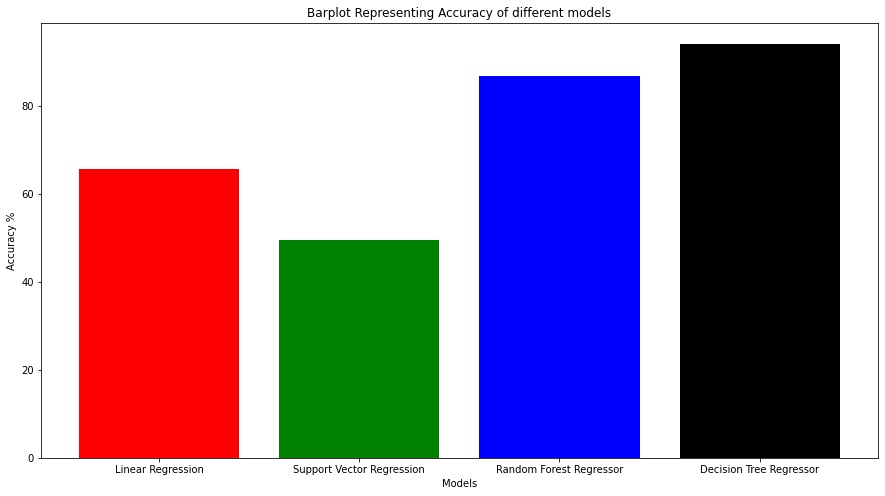

In [ ]:
colors = ['red','green','blue','black']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()